## Import Section

In [86]:
import torch
import pandas as pd
import keras

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import seaborn as sns

import re

pd.set_option('display.max_columns', None)

### Importing Dataset

In [2]:
columnList = ['Nos','Conf Name','Abstract']
data = pd.read_csv("DBLPTrainset.txt", names=columnList, sep="\t")
data.head(10)

,Nos,Conf Name,Abstract
0,0,ISCAS,Scalable Serial-parallel Multiplier over GF(2m...
1,1,SIGGRAPH,Plenoptic sampling.
2,2,ISCAS,Sensitivity and uniformity of a 0.18micrometer...
3,3,WWW,A survey of web archive search architectures.
4,4,ISCAS,Understanding dynamic behavior of mm-wave CML ...
5,5,SIGGRAPH,Cosine lobe based relighting from gradient ill...
6,6,INFOCOM,Dimensioning an OBS Switch with Partial Wavele...
7,7,ISCAS,A study of identifibility for blind source sep...
8,8,ISCAS,A signal perturbation free semi-blind MRT MIMO...
9,9,ISCAS,A low-power V-band CMOS low-noise amplifier us...


### Data Exploration

In [3]:
#Listing out unique labels
print('List if labels ->',data['Conf Name'].unique())

print('Crude way of getting nos. of unique labels', data['Conf Name'].nunique())

List if labels -> ['ISCAS' 'SIGGRAPH' 'WWW' 'INFOCOM' 'VLDB']
Crude way of getting nos. of unique labels 5


In [4]:
print('Total Nos. of Labels and its counts:')
print(data['Conf Name'].value_counts())

Total Nos. of Labels and its counts:
ISCAS       7514
INFOCOM     4481
VLDB        3678
WWW         3292
SIGGRAPH    2678
Name: Conf Name, dtype: int64


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Classes')]

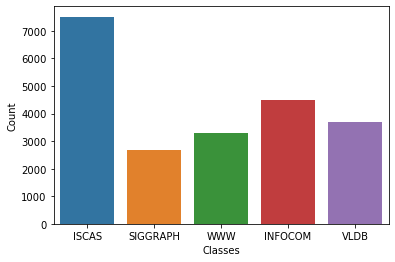

In [5]:
barGraph = sns.countplot(data['Conf Name'])
barGraph.set(xlabel = 'Classes', ylabel = 'Count')

In [6]:
#Checking if any record has missing Values
print('Total nos of rows with null/Nan values across the "Conf Name" column',data['Conf Name'].isnull().sum())

Total nos of rows with null/Nan values across the "Conf Name" column 0


### Data Preprocessing

In [7]:
lemmatizer = WordNetLemmatizer()

def preprocessing(sentence):
    text = str(sentence)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub('[0-9]+','',text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)
    

In [8]:
data['Abstract'] = data['Abstract'].apply(preprocessing)
data.head(10)

,Nos,Conf Name,Abstract
0,0,ISCAS,scalable serial parallel multiplier hierarchic...
1,1,SIGGRAPH,plenoptic sampling
2,2,ISCAS,sensitivity uniformity micrometer cmos tempora...
3,3,WWW,survey web archive search architecture
4,4,ISCAS,understanding dynamic behavior wave cml divide...
5,5,SIGGRAPH,cosine lobe based relighting gradient illumina...
6,6,INFOCOM,dimensioning ob switch partial wavelength conv...
7,7,ISCAS,study identifibility blind source separation v...
8,8,ISCAS,signal perturbation free semi blind mrt mimo c...
9,9,ISCAS,low power band cmos low noise amplifier using ...


### Data Representation

#### a) House Keeping work

Max Length -> 199
Top 90% of the length is 82.0 .This will be the maximum length. :)


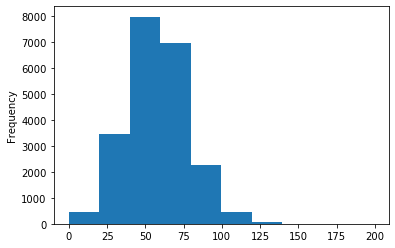

In [44]:
#Calculating max length of the sentence.
X = data['Abstract']
Y = data['Conf Name']

max_len = 0
def calculate_maxlength(sentence):
    global max_len
    text = str(sentence)
    length = len(text)
    if(length > max_len):
        max_len = length

data['Abstract'].apply(calculate_maxlength)
print('Max Length ->',max_len)

#Another way to calculate max length
data['len'] = data['Abstract'].apply(lambda s: len(s))
data['len'].plot.hist(bins=10)
max_len = data.len.quantile(0.9) #This gives top 90% of the length. Which came out to be 82. Max length is 199 but it is rare in dataset. Hence we're taking 90%.
print('Top 90% of the length is',max_len,'.This will be the maximum length. :)')

###### Splitting the dataset into train and test

In [94]:
train_X, test_X, train_Y, test_Y = train_test_split(data['Abstract'], data['Conf Name'], 
                                                    stratify=data['Conf Name'], test_size=0.25)

print("Train shape : ", train_X.shape)
print("Test shape :", test_X.shape)

Train shape :  (16232,)
Test shape : (5411,)


In [95]:
train_X.head(10)

1403                               letter associate editor
13117    model based multi component volume data labeli...
9369     rainewsbook browsing worldwide multimodal news...
1050        location aware peak value query sensor network
19464    educating technophile artist experience highly...
16292    ghz sub fully integrated pll clock recovery ap...
12167          truce strategy post apocalyptic computation
193                  scalable delivery stream query result
19970    low delay wireless scheduling partial channel ...
19629    high speed computational method fuzzy inferenc...
Name: Abstract, dtype: object

#### a) Tokenizer
We will use keras to tokenize the sentences/rows into words. <code>keras.preprocessing.text.Tokenizer</code> splits texts into tokens(words) while keeping only the words that occur most in the corpus.

In [96]:
#Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

print(train_X[0:10])

#Pad the sentences
train_X = pad_sequences(train_X, maxlen=int(max_len))
test_X = pad_sequences(test_X, maxlen=int(max_len))
print(train_X[0:10])

[[1067, 2226, 1348], [21, 2, 16, 490, 520, 5, 1426, 152], [5378, 534, 3301, 1349, 381, 1634, 1864, 420, 2826], [200, 73, 1068, 535, 20, 17, 1], [4016, 5379, 1635, 408, 436, 3302, 179, 219, 2485, 3303], [170, 359, 306, 116, 686, 201, 326, 13, 4, 135, 4017], [5380, 266, 1069, 5381, 235], [65, 445, 128, 20, 327], [8, 43, 7, 50, 821, 40, 205, 36], [19, 89, 822, 44, 795, 577, 3, 455, 3]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1067 2226 1348]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 

#### b) Encoding the Labels

In [97]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
train_Y = labelEncoder.fit_transform(train_Y.values)
test_Y  = labelEncoder.fit_transform(test_Y.values)

#Printing the Labels/classes from the dataset
print('Printing the label from train_Y list',train_Y[0:10])

#Printing the labels/classes
print('Printing the labels overall',labelEncoder.classes_)

Printing the label from train_Y list [3 2 4 0 2 1 2 3 0 1]
Printing the labels overall ['INFOCOM' 'ISCAS' 'SIGGRAPH' 'VLDB' 'WWW']


[1 2 1 ... 1 1 2]
